# Question 1

## Initialize Data and Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

## Visualize Data

The training data very obviously follows a cubic function. The test data on the other hand is looks somewhat like a normal linear function, but with tails at both ends that break the linear relationship. 

I have not trained a model yet, but my hypothesis would be that the cubic linear regression model would be best suited to this data. It's easier to stretch out a cubic function to be simple than it is to try to make a linear model fit complex data. 

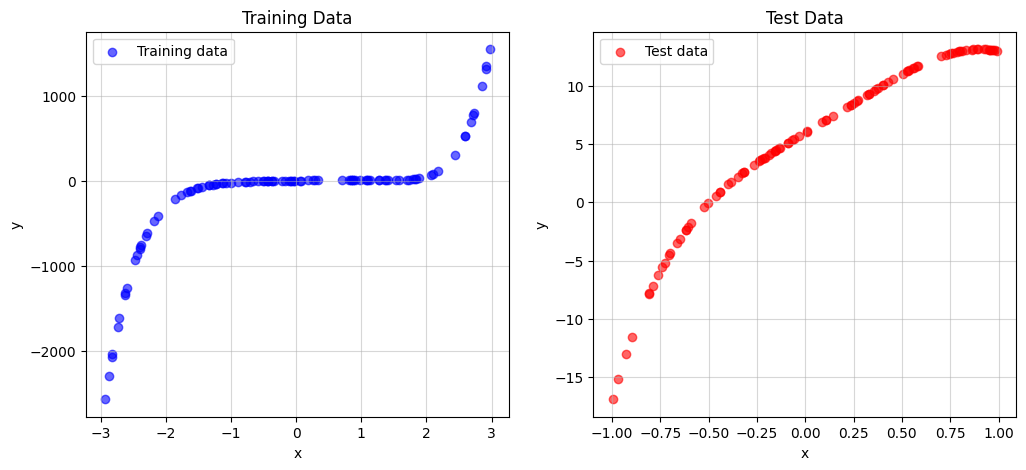

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(x_train, y_train, color='blue', alpha=0.6, label='Training data')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Training Data')
axes[0].legend()
axes[0].grid(True, alpha=0.5)

axes[1].scatter(x_test, y_test, color='red', alpha=0.6, label='Test data')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Test Data')
axes[1].legend()
axes[1].grid(True, alpha=0.5)

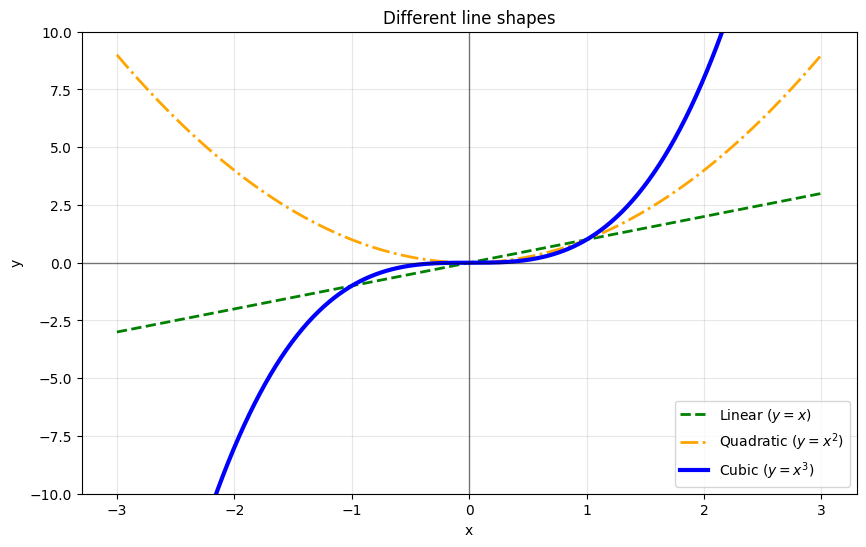

In [4]:
x = np.linspace(-3, 3, 400)
y_linear = x
y_quadratic = x**2
y_cubic = x**3

plt.figure(figsize=(10, 6))
plt.plot(x, y_linear, label='Linear ($y = x$)', color='green', linestyle='--', linewidth=2)
plt.plot(x, y_quadratic, label='Quadratic ($y = x^2$)', color='orange', linestyle='-.', linewidth=2)
plt.plot(x, y_cubic, label='Cubic ($y = x^3$)', color='blue', linewidth=3)

plt.axhline(0, color='black', linewidth=1, alpha=0.5)
plt.axvline(0, color='black', linewidth=1, alpha=0.5)
plt.title('Different line shapes')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-10, 10) 
plt.show()

## Linear Regression Implementation

Reference: I used the following geeks for geeks guide to figure out how to implement a basic linear regression model of degree 1 (https://www.geeksforgeeks.org/machine-learning/ml-normal-equation-in-linear-regression/)

TRAIN - Degree 1


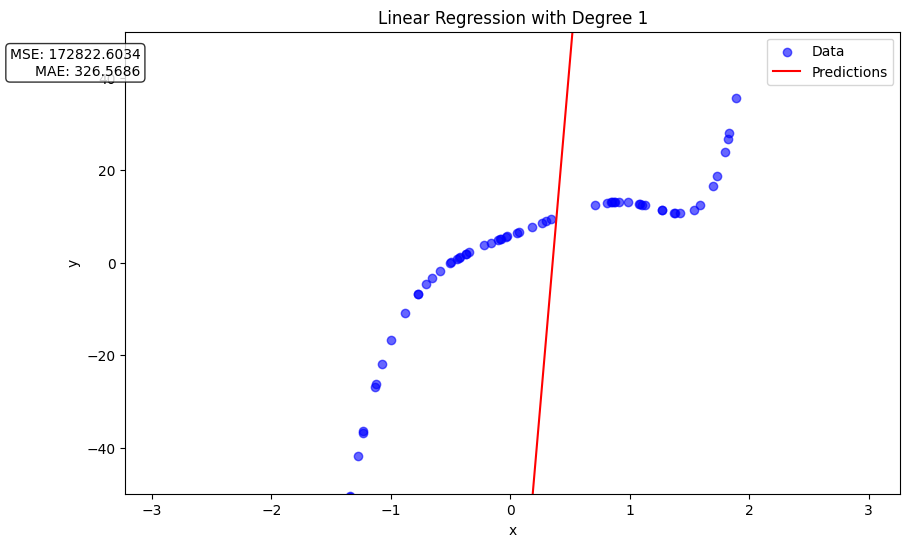

TRAIN - Degree 2


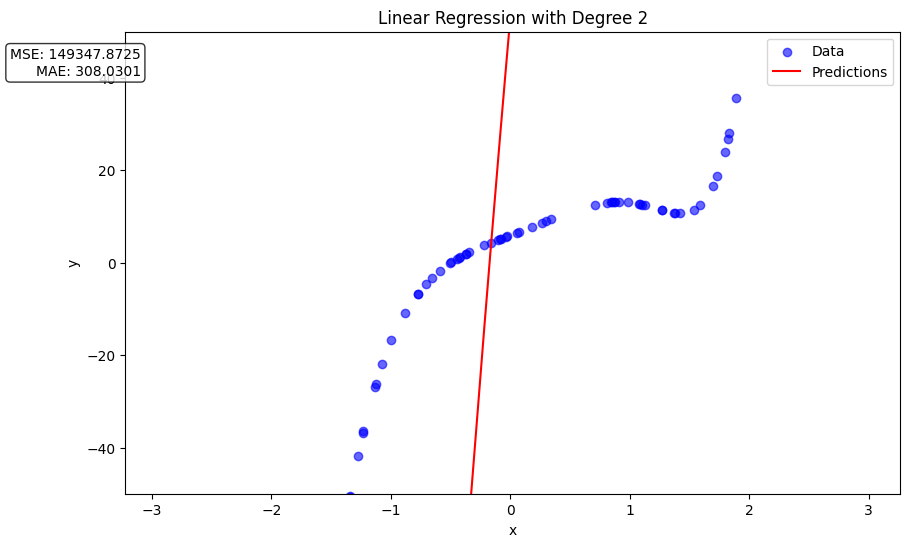

TRAIN - Degree 3


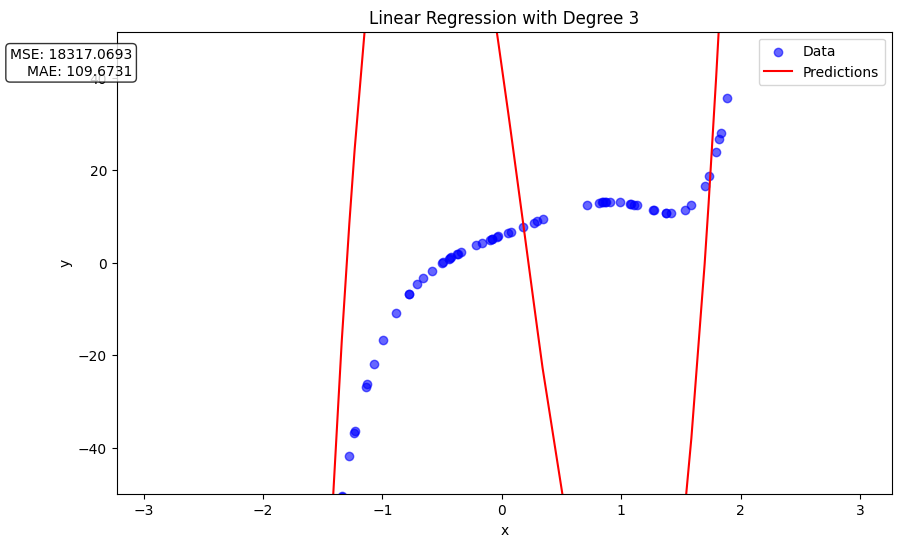

TEST - Degree 1


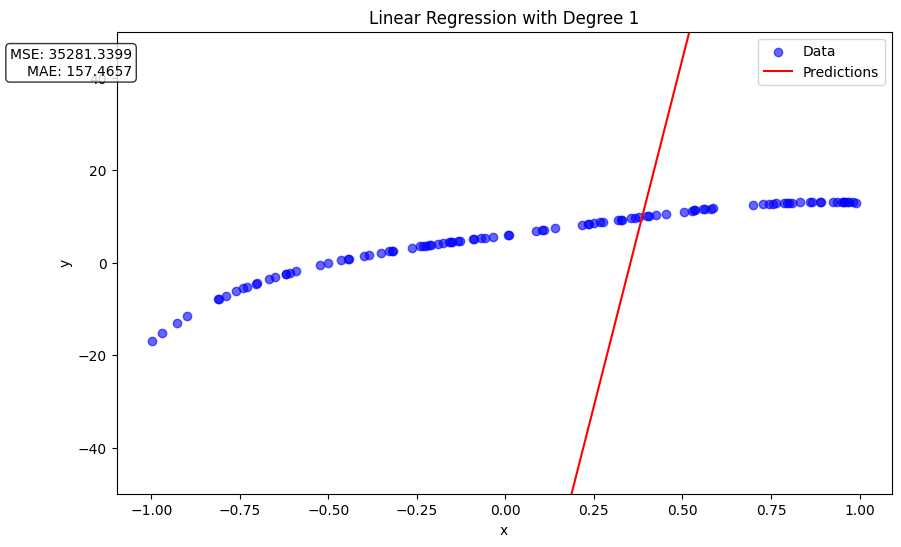

TEST - Degree 2


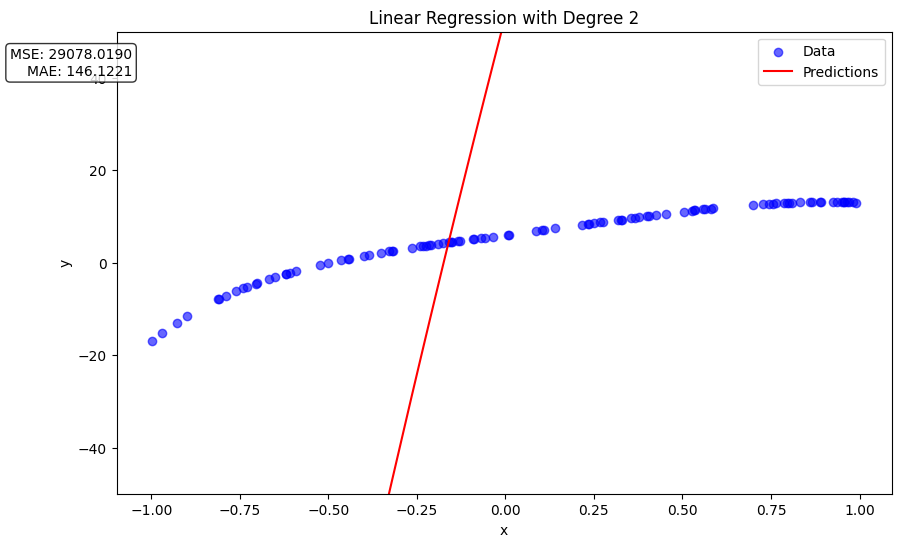

TEST - Degree 3


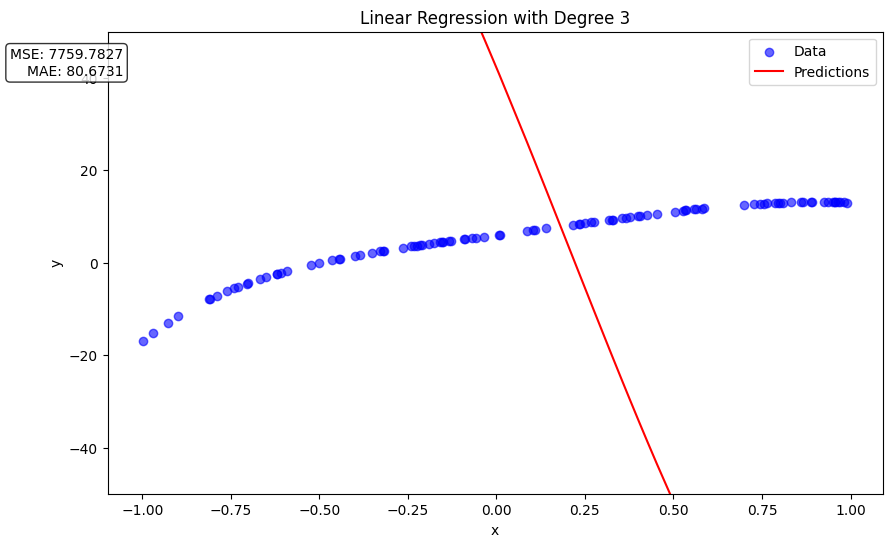

In [31]:
def linear_regression(x_train, y_train, x_pred, degree):
    x_train = x_train.reshape(-1, 1)
    x_pred = x_pred.reshape(-1, 1)
    y_train = y_train.reshape(-1, 1)
    
    if degree == 1:
        X_train = x_train.reshape(-1, 1)
        X_pred  = x_pred.reshape(-1, 1)
    else:
        X_train = np.column_stack([x_train**i for i in range(1, degree + 1)])
        X_pred  = np.column_stack([x_pred**i  for i in range(1, degree + 1)])
        
    X_train = np.column_stack([np.ones(X_train.shape[0]), X_train])
    X_pred  = np.column_stack([np.ones(X_pred.shape[0]),  X_pred])
    
    x_t = X_train.T
    x_t_x = x_t @ X_train
    x_t_y = x_t @ y_train
    # theta = np.linalg.solve(x_t_x, x_t_y)
    theta, *_ = np.linalg.lstsq(X_train, y_train, rcond=None)


    predictions = X_pred @ theta
    return predictions

def evaluate_and_plot(predictions, x_test, y_test, degree):
    predictions = predictions.reshape(-1)
    x_test = x_test.reshape(-1)
    y_test = y_test.reshape(-1)
    residuals = predictions - y_test
    
    mse = np.mean(residuals ** 2)
    mae = np.mean(np.abs(residuals))
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x_test, y_test, color='blue', alpha=0.6, label='Data')

    idx = np.argsort(x_test)
    plt.plot(x_test[idx], predictions[idx], color='red', label='Predictions')
    
    plt.title(f'Linear Regression with Degree {degree}')
    plt.xlabel('x')
    plt.ylabel('y')

    ax = plt.gca()
    ax.text(
        0.02, 0.90,
        f"MSE: {mse:.4f}\nMAE: {mae:.4f}",
        transform=ax.transAxes,
        va="bottom",
        ha="right",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
    )
    plt.ylim(-50, 50)
    plt.legend()
    plt.show()

for degree in [1, 2, 3]:
    print(f"TRAIN - Degree {degree}")
    train_preds = linear_regression(x_train, y_train, x_train, degree)
    evaluate_and_plot(train_preds, x_train, y_train, degree)

for degree in [1, 2, 3]:
    print(f"TEST - Degree {degree}")
    test_preds = linear_regression(x_train, y_train, x_test, degree)
    evaluate_and_plot(test_preds, x_test, y_test, degree)



# Question 2

## Get Data

In [66]:
import pandas as pd


def linear_regression(x_train, y_train, x_pred, degree):
    y_train = y_train.reshape(-1, 1)
    
    X_train_poly = []
    X_pred_poly = []
    
    for col in range(x_train.shape[1]):
        for d in range(1, degree + 1):
            X_train_poly.append(x_train[:, col] ** d)
            X_pred_poly.append(x_pred[:, col] ** d)
    
    X_train = np.column_stack(X_train_poly)
    X_pred = np.column_stack(X_pred_poly)
    
    # Add bias term
    X_train = np.column_stack([np.ones(X_train.shape[0]), X_train])
    X_pred = np.column_stack([np.ones(X_pred.shape[0]), X_pred])
    
    theta, *_ = np.linalg.lstsq(X_train, y_train, rcond=None)
    predictions = X_pred @ theta
    
    return predictions

def evaluate(predictions, x_test, y_test, degree):
    predictions = predictions.reshape(-1)
    y_test = y_test.reshape(-1)
    
    residuals = predictions - y_test
    mse = np.mean(residuals ** 2)
    mae = np.mean(np.abs(residuals))
    
    # print(f"MSE: {mse:.4f}")
    # print(f"MAE: {mae:.4f}")
    
    return mae
    
df = pd.read_excel('Housing_data_regression.xlsx')
df.head()
df.info()
print(df.columns)

predictors = df.iloc[:, :-1].to_numpy(dtype=float)
predictors = df.drop(columns=["Price", "House ID"]).to_numpy(dtype=float)
price = df.iloc[:, -1].to_numpy(dtype=float)

print(X.shape)
print(y.shape)

for degree in [1]:
    train_preds = linear_regression(predictors, price, predictors, degree)
    print(evaluate(train_preds, predictors, price, degree))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   House ID     20 non-null     int64  
 1   Bathrooms    20 non-null     float64
 2   Land Area    20 non-null     float64
 3   Living area  20 non-null     float64
 4   # Garages    20 non-null     float64
 5   # Rooms      20 non-null     int64  
 6   # Bedrooms   20 non-null     int64  
 7   Age of home  20 non-null     int64  
 8   Price        20 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 1.5 KB
Index(['House ID', 'Bathrooms', 'Land Area', 'Living area', '# Garages',
       '# Rooms', '# Bedrooms', 'Age of home', 'Price'],
      dtype='object')
(20, 8)
(20,)
52555.86423534419


## Determine correlations

In [72]:
correlations = {}
for i, feature_name in enumerate(feature_names):
    corr = np.corrcoef(predictors[:, i], price)[0, 1]
    correlations[feature_name] = abs(corr)  # Use absolute value
    print(f"{feature_name}: {corr:.4f}")

most_correlated = max(correlations, key=correlations.get)

Bathrooms: 0.9326
Land Area: 0.7265
Living area: 0.9361
# Garages: 0.4888
# Rooms: 0.8479
# Bedrooms: 0.7161
Age of home: -0.3860


## Train model with 1 predictor

In [78]:
feature_names = df.drop(columns=["Price", "House ID"]).columns.tolist()
individual_scores = {}

for i, feature_name in enumerate(feature_names):
    single_feature = predictors[:, i:i+1]  
    preds = linear_regression(single_feature, price, single_feature, degree)
    mae = evaluate(preds, single_feature, price, degree)
    individual_scores[feature_name] = mae
    # print(f"{feature_name}: MAE = {int(mae)}")
    
for feature_name, mae in sorted(individual_scores.items(), key=lambda x: x[1]):
    print(f"Only train with {feature_name}: MAE = {int(mae)}")


Only train with Bathrooms: MAE = 80781
Only train with Living area: MAE = 89596
Only train with # Rooms: MAE = 139440
Only train with Land Area: MAE = 144664
Only train with # Bedrooms: MAE = 173322
Only train with Age of home: MAE = 198644
Only train with # Garages: MAE = 207443


## Train model with n-1 predictor

In [76]:
feature_names = df.drop(columns=["Price", "House ID"]).columns.tolist()
without_i_scores = {}

for i, feature_name in enumerate(feature_names):
    features_without_i = np.delete(predictors, i, axis=1)
    preds = linear_regression(features_without_i, price, features_without_i, degree)
    mae = evaluate(preds, features_without_i, price, degree)

    without_i_scores[feature_name] = mae
    # print(f"Removed {feature_name}: MAE = {int(mae)}")
    
for feature_name, mae in sorted(without_i_scores.items(), key=lambda x: x[1]):
    print(f"Removed {feature_name}: MAE = {int(mae)}")


Removed Land Area: MAE = 50968
Removed Living area: MAE = 54330
Removed Age of home: MAE = 55826
Removed # Garages: MAE = 56027
Removed Bathrooms: MAE = 63185
Removed # Bedrooms: MAE = 64723
Removed # Rooms: MAE = 66147
